In [ ]:
import pandas as pd
import numpy as nd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv('/content/glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df.shape

(18, 18)

In [ ]:
#Checking for missing data
NAs= pd.concat([df.isnull().sum()],axis=1,keys=['df'])
NAs[NAs.sum(axis=1)>0]

,df


In [ ]:
for col in df.dtypes[df.dtypes=='object'].index:
  for_dummy = df.pop(col)
  df = pd.concat([df,pd.get_dummies(for_dummy,prefix=col)],axis=1)
  df.head()

In [ ]:
#Dropping the class(Type column) from the X set and moving it in the Y set
X = df.drop(['Type'],axis =1)
Y = df['Type']

In [ ]:
df.corr()['Type'].abs().sort_values(ascending=False)

,Type
Type,1.000000
Mg,0.744993
Al,0.598829
Ba,0.575161
Na,0.502898
Fe,0.188278
RI,0.164237
Si,0.151565
K,0.010054
Ca,0.000952


In [ ]:
#calculating skewness
import matplotlib.pylab as plt
from sklearn import preprocessing
from scipy.stats import skew
from scipy.stats import boxcox
import numpy as np

In [ ]:
classes = X.columns.values
X_unsk = pd.DataFrame() # it contain the unskewed features

# looping through the
for c in classes:
    scaled = preprocessing.scale(X[c])
    boxcox_scaled = preprocessing.scale(boxcox(X[c] + np.max(np.abs(X[c]) +1) )[0])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:280: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:280: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:280: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close t

In [ ]:
 #Populating
X_unsk[c] = boxcox_scaled

In [ ]:
#calculating Skewness using skew in scipy.stats
skness = skew(scaled)
boxcox_skness = skew(boxcox_scaled)

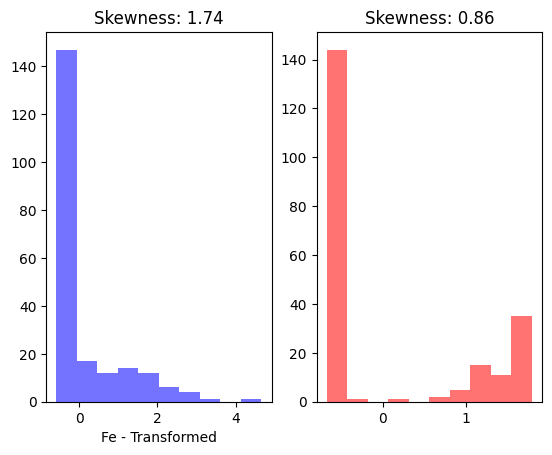

In [ ]:
#original data
figure = plt.figure()
figure.add_subplot(121)
plt.hist(scaled,facecolor='blue',alpha=0.55)
plt.xlabel(c + " - Transformed")
plt.title("Skewness: {0:.2f}".format(skness))

# unskewed data
figure.add_subplot(122)
plt.hist(boxcox_scaled,facecolor='red',alpha=0.55)
plt.title("Skewness: {0:.2f}".format(boxcox_skness))
plt.show()

In [ ]:
#Hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import math

In [ ]:
#unskewed data
X = X_unsk
X_tr, X_ts, y_tr, y_ts = train_test_split(X, Y, test_size=0.40, random_state=42)

In [ ]:
rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
param_grid = { "criterion" : ["gini", "entropy"]
              , "min_samples_leaf" : [1, 5, 10]
              , "min_samples_split" : [2, 4, 10, 12, 16]
              , "n_estimators": [100, 125, 200]}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Adjust the max_features parameter
rf = RandomForestClassifier(max_features='sqrt')  # or 'log2', or a specific int/float value

In [ ]:
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
gs = gs.fit(X_tr, y_tr)

In [ ]:
print(gs.best_score_)
print(gs.best_params_)

0.38335179032853456
{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
bp  = gs.best_params_
rf = RandomForestClassifier( criterion=bp['criterion'],
                             n_estimators=bp['n_estimators'],
                             min_samples_split=bp['min_samples_split'],
                             min_samples_leaf=bp['min_samples_leaf'],
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Correct the 'max_features' parameter
rf = RandomForestClassifier(max_features='sqrt')  # or 'log2', or a specific int/float value

# Fit the model
rf.fit(X_tr, y_tr)

RandomForestClassifier()

In [ ]:
param_grid = {
    'max_features': ['sqrt', 'log2', None],  # Remove 'auto' from the list
    # other hyperparameters
}

In [ ]:
rf.fit(X_tr, y_tr)
pred = rf.predict(X_ts)

score = rf.score(X_ts, y_ts)
print("Score: %.3f" % (score))

Score: 0.337


Features importance

In [ ]:
pd.concat((pd.DataFrame(X.columns, columns = ['variable']),
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])),
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
0,Fe,1.0


#1. Explain Bagging and Boosting methods. How is it different from each other.
Ans:-

-> Bagging reduces variance by training multiple independent models in parallel. Each model is assigned an equal weight.

->Bagging is best for models with high variance and low bias.

->Boosting reduces bias by training models sequentially, with each model learning from the errors of the previous models.

->Models are weighted based on accuracy, with better models receiving a higher weight.

->Boosting is effective when the model needs to be adaptive to errors.

#2. Explain how to handle imbalance in the data.
Ans:-

->The first technique to handle imbalance in data is choosing a proper evaluation metric. The accuracy of a classifier is the total number of correct predictions divided by the total number of predictions.

->F1 score keeps the balance between precision and recall and improves the score only if the classifier identifies more of a certain class correctly.

->The second technique used to handle the imbalanced data is used to upsample or downsample the minority or majority class. This technique used to handle imbalanced data is called oversampling.